In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# 1. Data exploration

In [2]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

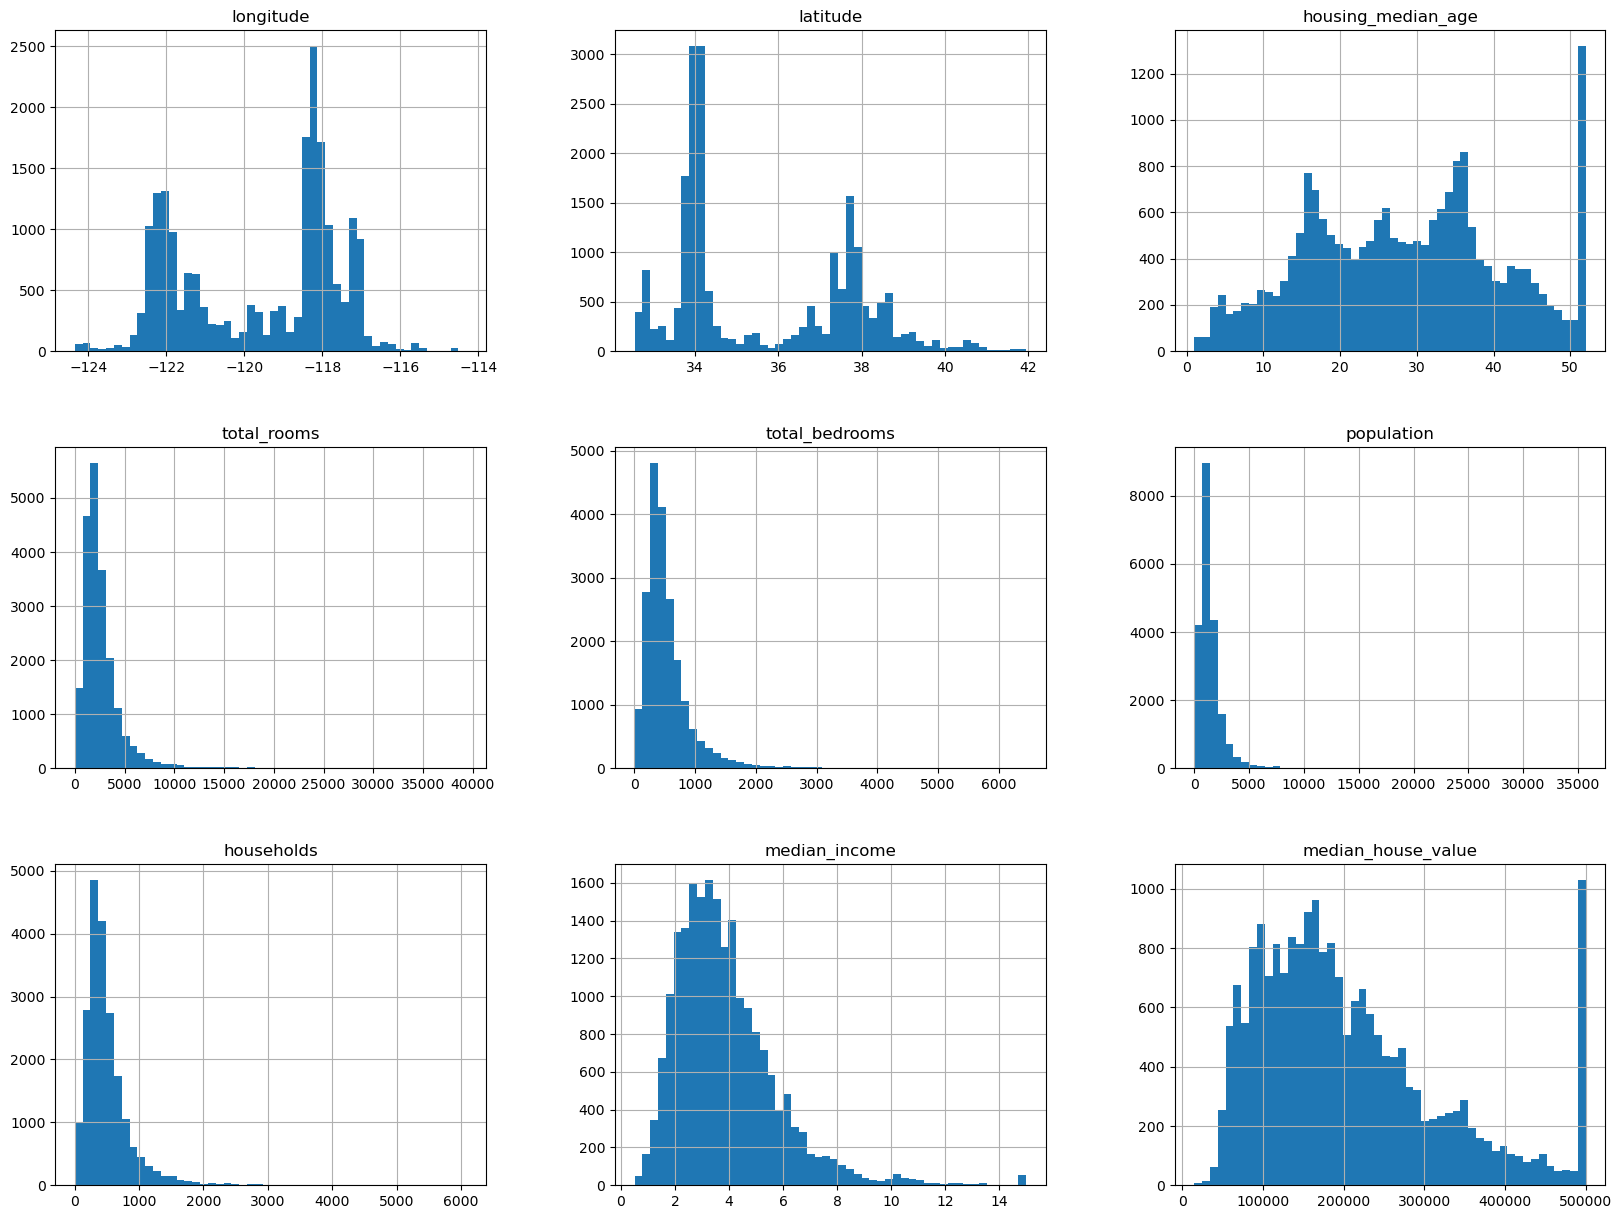

In [6]:
%matplotlib inline
housing_df.hist(bins=50, figsize=(20,15))
plt.show()
 

In [7]:
#split dataset into a training_set and test_set
#simple method
training_set = housing_df[:16000]
test_set = housing_df[16000:]

#dynamical method
training_set_threshold = int(len(housing_df)*0.8)

training_set = housing_df[:training_set_threshold]
test_set = housing_df[training_set_threshold:]

print("training_set size", len(training_set))
print("test_set size", len(test_set))

training_set size 16512
test_set size 4128


In [8]:
housing_without_ocean_proximity = housing_df.drop("ocean_proximity", axis = 1)

In [9]:
#look at the correlation matrix of the whole df without ocean
housing_without_ocean_proximity.corr()["median_house_value"]


longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [11]:
#Cours 25/11/2024

In [12]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

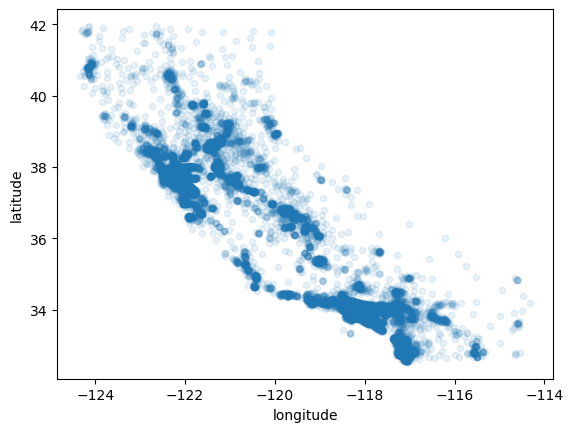

In [14]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [15]:
housing_without_ocean_proximity.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# 2. Feature engineering

In [17]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
housing_df["rooms_per_households"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["rooms_per_households"]

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_households, Length: 20640, dtype: float64

In [23]:
housing_df["bedrooms_per_households"] = housing_df["total_bedrooms"]/housing_df["households"]
housing_df["bedrooms_per_rooms"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_households"] = housing_df["population"]/housing_df["households"]

In [24]:
housing_without_ocean_proximity_df_bis = housing_df.drop("ocean_proximity", axis=1)

In [25]:
housing_without_ocean_proximity_df_bis.corr()["median_house_value"]

longitude                   -0.045967
latitude                    -0.144160
housing_median_age           0.105623
total_rooms                  0.134153
total_bedrooms               0.049686
population                  -0.024650
households                   0.065843
median_income                0.688075
median_house_value           1.000000
rooms_per_households         0.151948
bedrooms_per_households     -0.046739
bedrooms_per_rooms          -0.255880
population_per_households   -0.023737
Name: median_house_value, dtype: float64

In [ ]:

#simple method
training_set = housing_df[:16000]
test_set = housing_df[16000:]

#dynamical method
training_set_threshold = int(len(housing_df)*0.8)

training_set = housing_df[:training_set_threshold]
test_set = housing_df[training_set_threshold:]

print("training_set size", len(training_set))
print("test_set size", len(test_set))

In [35]:
def sets_creation(df, first_threshold, ratio):
    #simple method
    training_set = df[:first_threshold]
    test_set = df[first_threshold:]
    
    #dynamical method
    training_set_threshold = int(len(df)*ratio)

    training_set = df[:training_set_threshold]
    test_set = df[training_set_threshold:]
    print("training_set size", len(training_set))
    print("test_set size", len(test_set))
    
    return training_set, test_set

In [54]:
from common_3 import sets_creation

training_set_1, test_set_1 = sets_creation(housing_df, 15000, 0.7)

training_set size 14447
test_set size 6193


In [55]:
training_set_1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_households',
       'bedrooms_per_households', 'bedrooms_per_rooms',
       'population_per_households'],
      dtype='object')

In [56]:
housing_labels_trains_df = training_set_1["median_house_value"].copy()

housing_train_without_labels_df = training_set_1.drop("median_house_value", axis=1)

In [49]:
housing_train_without_labels_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_per_households,bedrooms_per_rooms,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,1.081081,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,-117.25,32.80,35.0,2281.0,506.0,1005.0,496.0,4.2296,NEAR OCEAN,4.598790,1.020161,0.221833,2.026210
14443,-117.25,32.80,26.0,2442.0,659.0,1134.0,624.0,3.3274,NEAR OCEAN,3.913462,1.056090,0.269861,1.817308
14444,-117.26,32.81,25.0,2076.0,586.0,1060.0,554.0,2.8421,NEAR OCEAN,3.747292,1.057762,0.282274,1.913357
14445,-117.26,32.81,30.0,1328.0,346.0,577.0,328.0,2.3284,NEAR OCEAN,4.048780,1.054878,0.260542,1.759146


In [ ]:
#traitement valeur manquante

#option 1 : supprimer la colonne
housing_df.drop("total_bedrooms", axis=1)

#option 2 : suppr observations ayant des null comme valeur dans cette colonne
housing_df.dropna(subset=["total_bedrooms"])

#option 3 : remplacer valeurs manquantes par une autre valeur (mediane, mpyenne...)
mediane_total_bedrooms = housing_df["total_bedrooms"].median()

housing_df["total_bedrooms"] = housing_df["total_bedrooms"].fillna(mediane_total_bedrooms)